In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv',header=0)

In [3]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
df['bmi']=df['weight']/((df['height']/100)**2)

In [5]:
df['overweight']=np.where(df['bmi']>25, 1, 0) #overweight col

In [6]:
df['cholesterol']=np.where(df['cholesterol']>1 , 1, 0)
df['gluc']=np.where(df['gluc']>1 , 1, 0)

In [8]:
df = df[(df['height'] >= df['height'].quantile(0.025)) & (df['height']<= df['height'].quantile(0.975))]
#df = df[df.height >= df['height'].quantile(0.025)] #also works
df = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight']<= df['weight'].quantile(0.975))]

df = df[df['ap_lo']<=df['ap_hi']]


In [9]:
catdf=df.melt(id_vars=['cardio'],value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])


cardio     variable  value
0            0  cholesterol      0
1            1  cholesterol      1
2            1  cholesterol      1
3            1  cholesterol      0
4            0  cholesterol      0
...        ...          ...    ...
376699       1   overweight      0
376700       1   overweight      1
376701       0   overweight      1
376702       1   overweight      1
376703       0   overweight      0

[376704 rows x 3 columns]

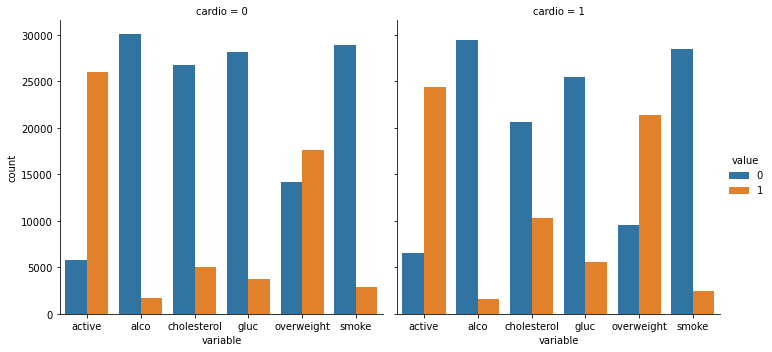

In [10]:
sns.catplot(kind='count',col='cardio', x='variable', hue = 'value', data=catdf, order=['active','alco','cholesterol','gluc','overweight','smoke'])

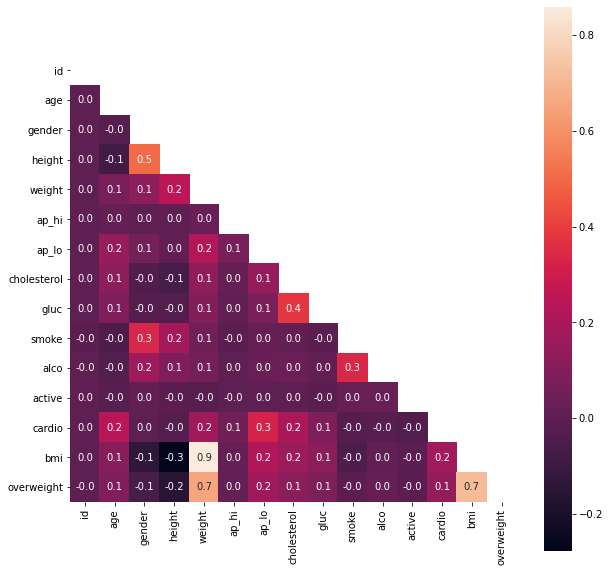

In [22]:
heatdf=df.corr()
mask_ut=np.triu(np.ones(heatdf.shape)).astype(np.bool)
plt.figure(figsize=(10, 10))

sns.heatmap(data=heatdf,mask=mask_ut,annot=True, fmt='.1f', square=True)